<a href="https://colab.research.google.com/github/Rushi589/Loan_Approval_Prediction_Model/blob/main/Loan_approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/train_loan_approval.csv")

**Data Understanding**

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.corr(numeric_only=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [ ]:
df.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [ ]:
df.duplicated().sum()

np.int64(0)

**EDA**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
for i in df.columns[df.dtypes=='object']:
  print(df[i].value_counts())

Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Loan_Status
Y    422
N    192
Name: count, dtype: int64


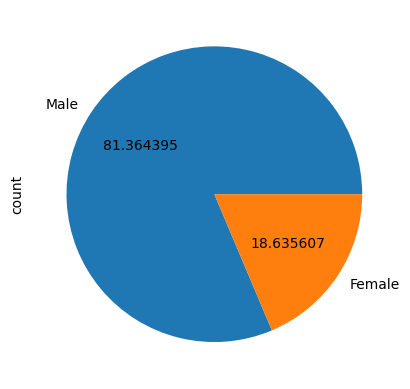

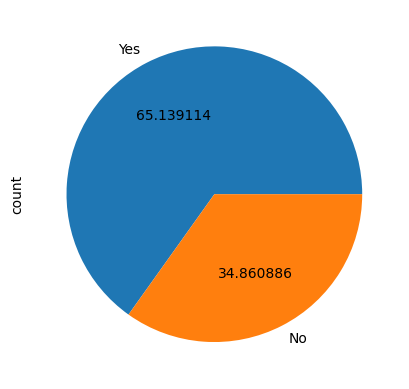

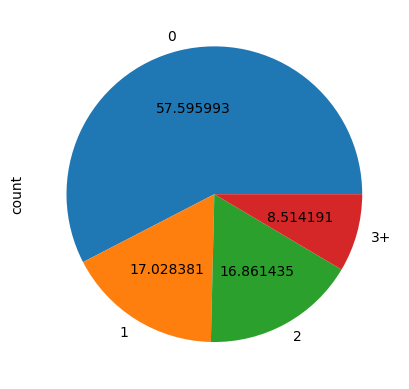

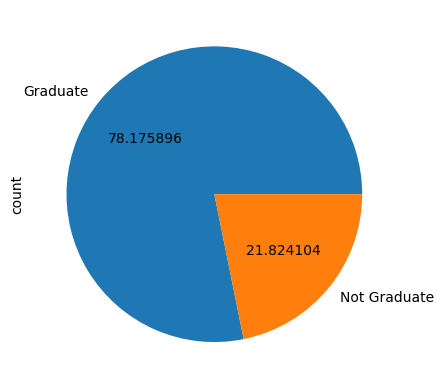

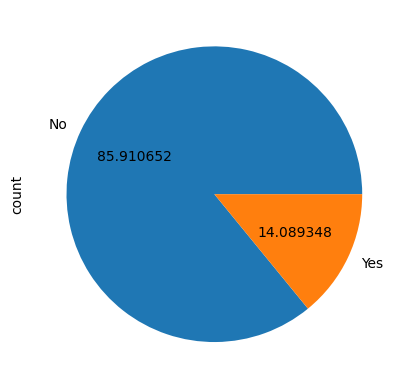

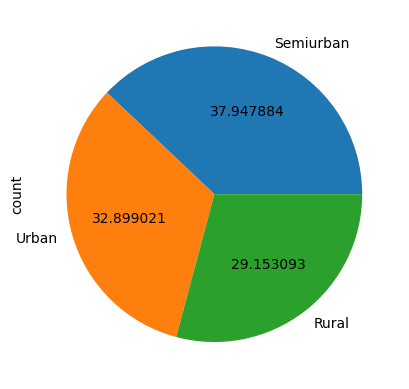

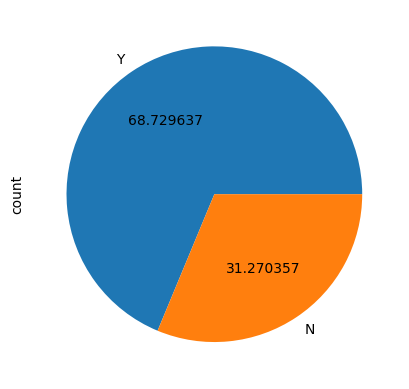

In [ ]:
for i in df.columns[df.dtypes=='object']:
  plt.figure()
  df[i].value_counts().plot(kind='pie',autopct="%2f")
  plt.show()


In [ ]:
for i in df.columns[df.dtypes=='object']:
 print(pd.crosstab(df[i],df['Loan_Status']))

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339
Loan_Status    N    Y
Married              
No            79  134
Yes          113  285
Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33
Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82
Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56
Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133
Loan_Status    N    Y
Loan_Status          
N            192    0
Y              0  422


In [ ]:
for i in df.columns[df.dtypes!='object']:
  print(i,df[i].skew())

ApplicantIncome 6.539513113994625
CoapplicantIncome 7.491531216657306
LoanAmount 2.677551679256059
Loan_Amount_Term -2.362414124216269
Credit_History -1.8823610612186696


ApplicantIncome 6.539513113994625


<ipython-input-17-14610539397b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


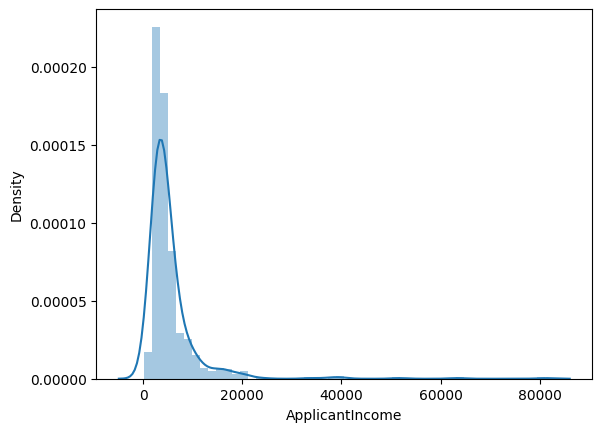

CoapplicantIncome 7.491531216657306


<ipython-input-17-14610539397b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


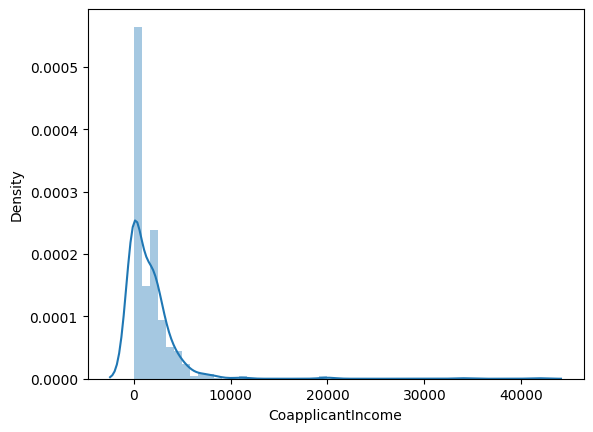

LoanAmount 2.677551679256059


<ipython-input-17-14610539397b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


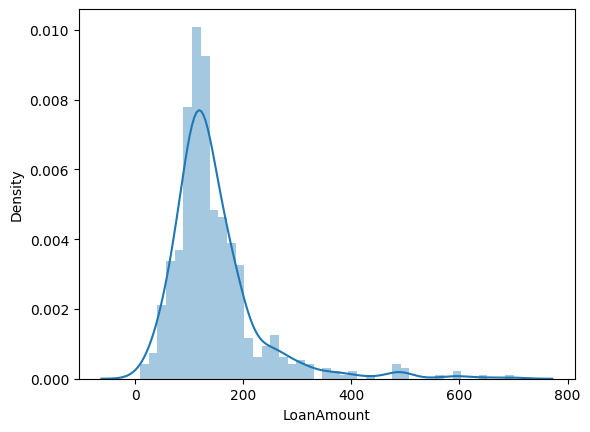

Loan_Amount_Term -2.362414124216269


<ipython-input-17-14610539397b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


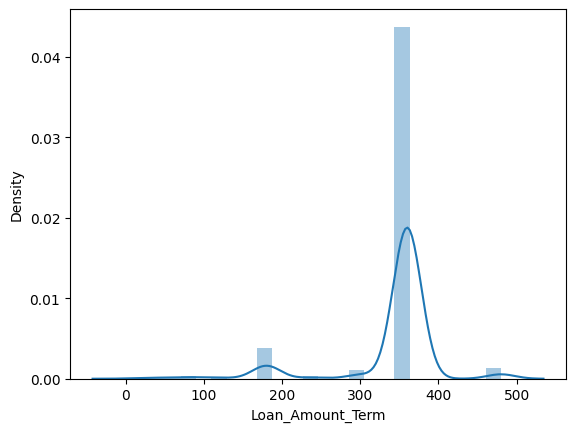

Credit_History -1.8823610612186696


<ipython-input-17-14610539397b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


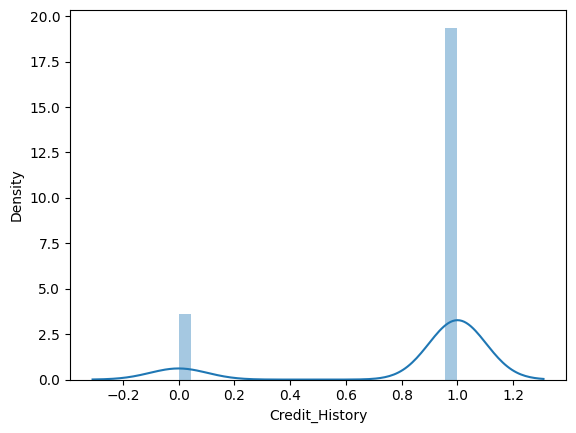

In [ ]:
for i in df.columns[df.dtypes!='object']:
  plt.figure()
  print(i,df[i].skew())
  sns.distplot(df[i])
  plt.show()

In [ ]:
df.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [ ]:
for i in df.columns:
  print(i,df[i].dtypes)

Gender object
Married object
Dependents object
Education object
Self_Employed object
ApplicantIncome int64
CoapplicantIncome float64
LoanAmount float64
Loan_Amount_Term float64
Credit_History float64
Property_Area object
Loan_Status object


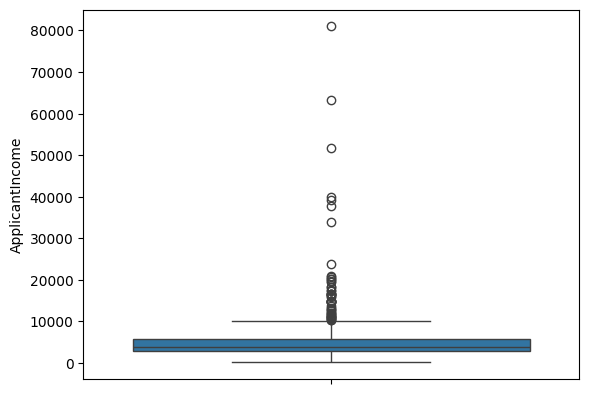

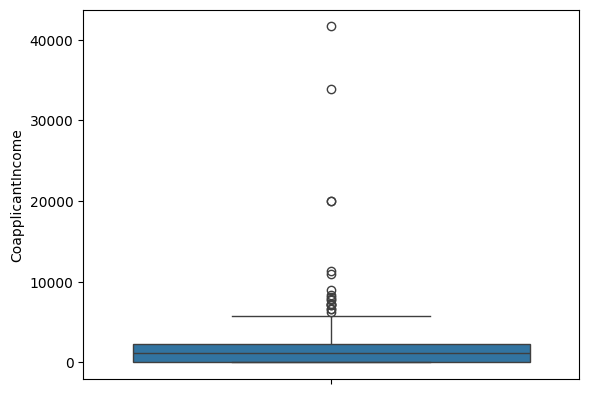

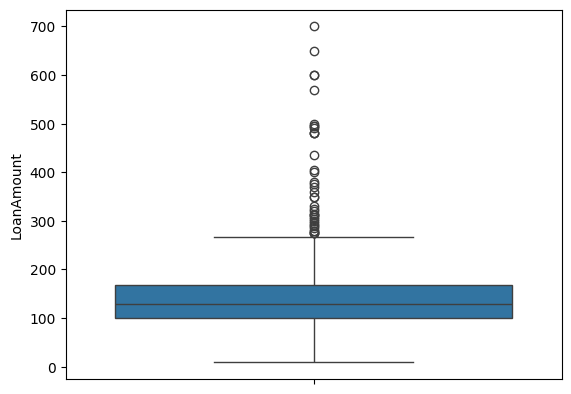

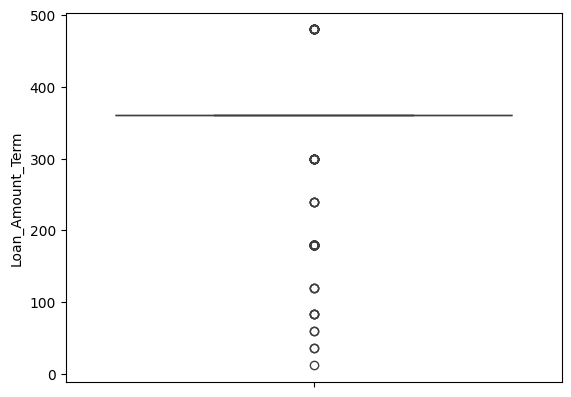

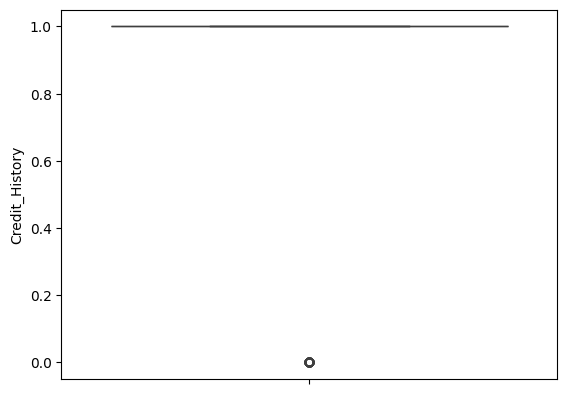

In [ ]:
for i in df.columns[df.dtypes!='object']:
  plt.figure()
  sns.boxplot(df[i])
  plt.show()

In [ ]:
for i in df.columns[df.dtypes!='object']:

  percentile_25=df[i].quantile(0.25)
  percentile_75=df[i].quantile(0.75)
  iqr=percentile_75-percentile_25

  upper_limit=percentile_75+1.5*iqr
  lower_limit=percentile_25-1.5*iqr

  upper_limit_in_percent=((df[i]>upper_limit).sum()/df.shape[0])*100
  lower_limit_in_percent=((df[i]<lower_limit).sum()/df.shape[0])*100

  print(i,upper_limit_in_percent,lower_limit_in_percent)

ApplicantIncome 8.143322475570033 0.0
CoapplicantIncome 2.9315960912052117 0.0
LoanAmount 6.351791530944626 0.0
Loan_Amount_Term 2.44299674267101 11.889250814332247
Credit_History 0.0 14.495114006514658


In [ ]:
outlier_remove=['ApplicantIncome','CoapplicantIncome','LoanAmount']

for i in outlier_remove:
  percentile_25=df[i].quantile(0.25)
  percentile_75=df[i].quantile(0.75)
  iqr=percentile_75-percentile_25

  upper_limit=percentile_75+1.5*iqr
  lower_limit=percentile_25-1.5*iqr

  df[i]=np.where(df[i]>upper_limit,upper_limit,
                            np.where(df[i]<lower_limit,lower_limit,df[i]))


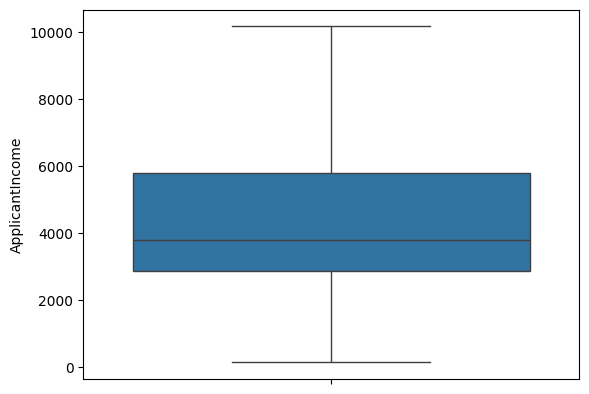

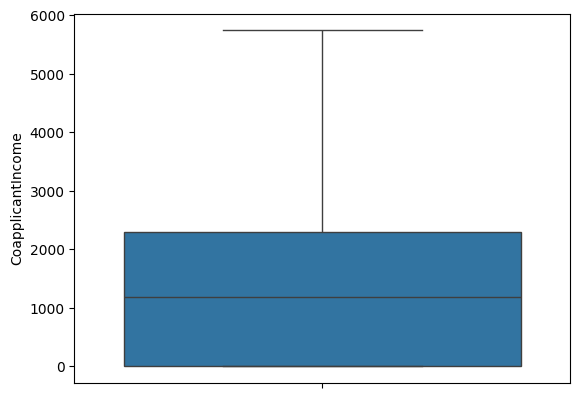

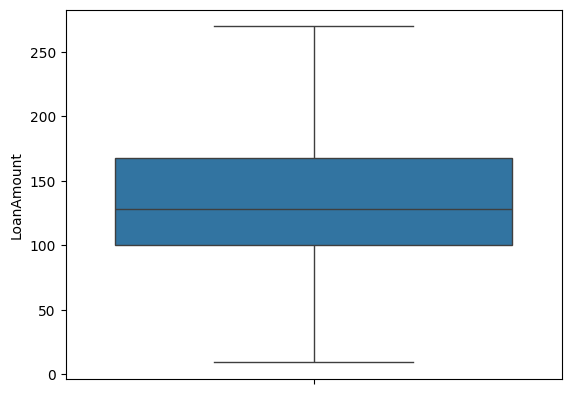

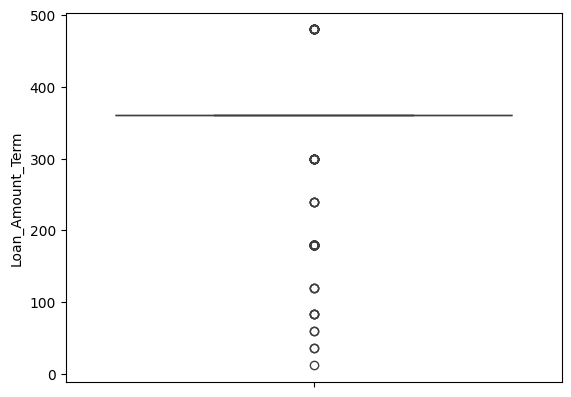

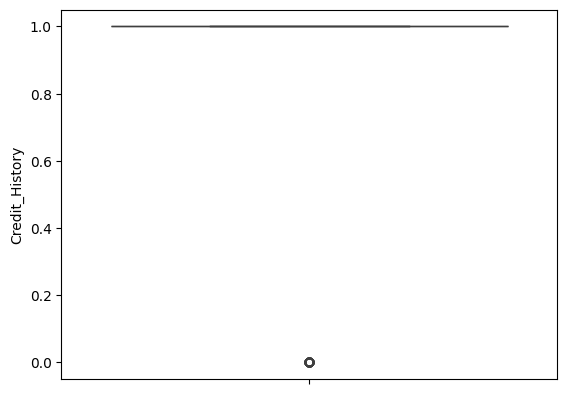

In [ ]:
for i in df.columns[df.dtypes!='object']:
  plt.figure()
  sns.boxplot(df[i])
  plt.show()

In [ ]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban


In [ ]:
y

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y
...,...
609,Y
610,Y
611,Y
612,Y


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((491, 11), (123, 11), (491, 1), (123, 1))

In [ ]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,Male,Yes,0,Graduate,No,6000.00,2250.0,265.0,360.0,NaN,Semiurban
90,Male,Yes,0,Graduate,No,2958.00,2900.0,131.0,360.0,1.0,Semiurban
227,Male,Yes,2,Graduate,No,6250.00,1695.0,210.0,360.0,1.0,Semiurban
482,Male,Yes,0,Graduate,No,2083.00,3150.0,128.0,360.0,1.0,Semiurban
464,Male,No,0,Graduate,No,4166.00,0.0,98.0,360.0,0.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
71,Male,Yes,2,Not Graduate,Yes,1875.00,1875.0,97.0,360.0,1.0,Semiurban
106,Male,Yes,2,Graduate,No,10171.25,1126.0,225.0,360.0,1.0,Urban
270,Female,No,0,Graduate,No,3237.00,0.0,30.0,360.0,1.0,Urban
435,Female,NaN,NaN,Graduate,No,10047.00,0.0,NaN,240.0,1.0,Semiurban


**Imputation**

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest,chi2


In [ ]:
most_frequent=['Gender','Married','Dependents','Self_Employed']
mean_impute=['LoanAmount','Loan_Amount_Term','Credit_History']

In [ ]:
impute1=SimpleImputer(strategy='most_frequent')

In [ ]:
impute2=SimpleImputer(strategy='mean')

In [ ]:
X_train[most_frequent]=impute1.fit_transform(X_train[most_frequent])
X_test[most_frequent]=impute1.transform(X_test[most_frequent])

In [ ]:
X_train[mean_impute]=impute2.fit_transform(X_train[mean_impute])
X_test[mean_impute]=impute2.transform(X_test[mean_impute])

**pipeline**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder,MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [ ]:
le=LabelEncoder()

In [ ]:
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
y_train

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,

In [ ]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,Male,Yes,0,Graduate,No,6000.00,2250.0,265.000000,360.0,0.844789,Semiurban
90,Male,Yes,0,Graduate,No,2958.00,2900.0,131.000000,360.0,1.000000,Semiurban
227,Male,Yes,2,Graduate,No,6250.00,1695.0,210.000000,360.0,1.000000,Semiurban
482,Male,Yes,0,Graduate,No,2083.00,3150.0,128.000000,360.0,1.000000,Semiurban
464,Male,No,0,Graduate,No,4166.00,0.0,98.000000,360.0,0.000000,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
71,Male,Yes,2,Not Graduate,Yes,1875.00,1875.0,97.000000,360.0,1.000000,Semiurban
106,Male,Yes,2,Graduate,No,10171.25,1126.0,225.000000,360.0,1.000000,Urban
270,Female,No,0,Graduate,No,3237.00,0.0,30.000000,360.0,1.000000,Urban
435,Female,Yes,0,Graduate,No,10047.00,0.0,139.924211,240.0,1.000000,Semiurban


In [ ]:
ohe_encode=['Gender','Married','Education','Self_Employed','Property_Area']
ordinal_encode=['Dependents']

In [ ]:
'''ct1=ColumnTransformer(transformers=[
    ('si_impute',SimpleImputer(strategy='most_frequent'),most_frequent)
],remainder='passthrough')'''

"ct1=ColumnTransformer(transformers=[\n    ('si_impute',SimpleImputer(strategy='most_frequent'),most_frequent)\n],remainder='passthrough')"

In [ ]:
'''ct2=ColumnTransformer(transformers=[
    ('si_impute',SimpleImputer(strategy='mean'),mean_impute)
],remainder='passthrough')'''

"ct2=ColumnTransformer(transformers=[\n    ('si_impute',SimpleImputer(strategy='mean'),mean_impute)\n],remainder='passthrough')"

In [ ]:
X_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
'''ct3 = ColumnTransformer(transformers=[
    ('ord', OrdinalEncoder(categories=[['0','1','2','3+']]),[2])
], remainder='passthrough')'''

"ct3 = ColumnTransformer(transformers=[\n    ('ord', OrdinalEncoder(categories=[['0','1','2','3+']]),[2])\n], remainder='passthrough')"

In [ ]:
ct4 = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'),[0,1,3,4,10]),
     ('ord', OrdinalEncoder(categories=[['0','1','2','3+']]),[2])
], remainder='passthrough')

In [ ]:
ct5=ColumnTransformer(transformers=[
    ('ss', StandardScaler(), slice(0,12))
],remainder='passthrough')

In [ ]:
ct6=RandomForestClassifier(n_estimators=200,bootstrap=True, random_state=12)

In [ ]:
pipeline = Pipeline([

    ('encode2', ct4),
    ('scaler', ct5),
    ('model', ct6)
])

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('encode2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1, 3, 4, 10]),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['0',
                                                                              '1',
                                                                              '2',
                                                                              '3+']]),
                                                  [2])])),
                ('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss', StandardScaler(),
                                                  slice(0, 12, None))])),
                ('model',
                 RandomForestClassifier(n_estimators=200, random_state=12))])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,pipeline.predict(X_test))

0.7804878048780488

In [ ]:
import pickle as pk

In [ ]:
#pk.dump(pipeline,open("pipeline.pkl",'wb'))

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
params={
    'model__n_estimators':[100,200,500],
    'model__bootstrap':[True,False]
}

In [ ]:
search=GridSearchCV(pipeline,params,cv=3,verbose=2,n_jobs=-1)

In [ ]:
search.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('encode2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         [0, 1,
                                                                          3, 4,
                                                                          10]),
                                                                        ('ord',
                                                                         OrdinalEncoder(categories=[['0',
                                                                                                     '1',
                                                                                                     '2',
                                                                                                     '3+']]),
                                                                         [2])])),
                                       ('scaler',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ss',
                                                                         StandardScaler(),
                                                                         slice(0, 12, None))])),
                                       ('model',
                                        RandomForestClassifier(n_estimators=200,
                                                               random_state=12))]),
             n_jobs=-1,
             param_grid={'model__bootstrap': [True, False],
                         'model__n_estimators': [100, 200, 500]},
             verbose=2)

In [ ]:
search.best_score_

np.float64(0.7963738839842387)

In [ ]:
search.best_params_

{'model__bootstrap': True, 'model__n_estimators': 200}